# Inference Sampling, sampling strategies
- The notebook visualizes the Recall metric at cutoffs [1,5,10,20] for different sampling techniques
- This helps us to understand how different sampling techniques approximate the no sampling method

In [1]:
# Before running the example notebook make sure to execute the following commands, to create the necessary datasets:
# ! python data/coveo_preproc.py -p data/data_sources/coveo_ecommerce
# ! python data/retailrocket_preproc.py -p data/data_sources/retailrocket_ecommerce
# ! python data/rees46_preproc.py -p data/data_sources/ress46_ecommerce

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import itertools
from collections import defaultdict

from utils.experiment_setup import gru4rec_sampling_setups as setups
from utils.gru4rec_train_test_utils import train_test_gru4rec_models 
from utils.plot_config import *
mpl.rc('lines', linewidth=plot_line_width)

In [3]:
experiments = {
    "coveo": {
        "train_path": "data/data_sources/coveo_ecommerce/coveo_processed_view_train_full.tsv",
        "test_path": "data/data_sources/coveo_ecommerce/coveo_processed_view_test.tsv",
        "methods": ["full", "closest", "farthest", "similar", "dissimilar", "uniform", "popular", "invpopular", "popstatic"],
        "model": "coveo_optuna_mrr_bprmax_constrained_fulltrain"
    },
    "retailrocket": {
        "train_path": "data/data_sources/retailrocket_ecommerce/retailrocket_processed_view_train_full.tsv",
        "test_path": "data/data_sources/retailrocket_ecommerce/retailrocket_processed_view_test.tsv",
        "methods": ["full", "closest", "farthest", "similar", "dissimilar", "uniform", "popular", "invpopular", "popstatic"],
        "model": "retailrocket_optuna_mrr_bprmax_constrained_fulltrain" 
    },
    "rees46": {
        "train_path": "data/data_sources/rees46_ecommerce/rees46_processed_view_train_full.tsv",
        "test_path": "data/data_sources/rees46_ecommerce/rees46_processed_view_test.tsv",
        "methods": ["full", "closest", "farthest", "similar", "dissimilar", "uniform", "popular", "invpopular", "popstatic"],
        "model": "rees46_optuna_mrr_xe_constrained_fulltrain"
    },
}
n_epochs = 5

In [4]:
# Model training
exp = {}
for dataset_name, dataset_params in experiments.items():
    exp[dataset_name] = {"train_path": dataset_params["train_path"]}
train_test_gru4rec_models(experiments=exp, setups=setups, n_epochs=n_epochs, save_model=True)

SKIPPING training, model already exists: data/models/coveo_optuna_mrr_bprmax_constrained_fulltrain.pickle
SKIPPING training, model already exists: data/models/coveo_optuna_mrr_xe_noembed_fulltrain.pickle
SKIPPING training, model already exists: data/models/retailrocket_localsearch100_bprmax_constrained_fulltrain.pickle
SKIPPING training, model already exists: data/models/retailrocket_optuna_recall_xe_embed_fulltrain.pickle
SKIPPING training, model already exists: data/models/rees46_optuna_mrr_xe_noembed_fulltrain.pickle
SKIPPING training, model already exists: data/models/rees46_localsearch100_bprmax_embed_fulltrain.pickle
SKIPPING training, model already exists: data/models/rees46_localsearchbig_bprmax_constrained_fulltrain.pickle


In [5]:
# Measuring recall and mrr values for different sample sizes
for dataset_key, dataset_params in experiments.items():
    train_path =  dataset_params["train_path"]
    test_path =  dataset_params["test_path"]
    methods = dataset_params["methods"]
    model = dataset_params["model"]
    model_path = os.path.join("data", "models", model+".pickle")
    ret_code = os.system(f"THEANO_FLAGS=device=cuda0 python sampling/inference_sampling.py --train_path {train_path} --test_path {test_path} --model_path {model_path} --methods {' '.join(methods)}")
    if ret_code != 0: raise ValueError(f"process returned with code: {ret_code}") 

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using cuDNN version 7104 on context None
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_full_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_closest_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_closest_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_farthest_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_farthest_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_similar_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_similar_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_dissimilar_recall.tsv
dat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using cuDNN version 7104 on context None
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_full_recall.tsv
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_closest_recall.tsv
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_closest_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_farthest_recall.tsv
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_farthest_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_similar_recall.tsv
data/results/sampling_results/retailrocket_optuna_mrr_bprmax_constrained_fulltrain_similar_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_op

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using cuDNN version 7104 on context None
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Building rank file for rees46_optuna_mrr_xe_constrained_fulltrain for full samples
Computing recall/mrr for rees46_optuna_mrr_xe_constrained_fulltrain for full samples
	Recall@1	 0.11141544
	MRR@1		 0.11141544
	Recall@5	 0.30097032
	MRR@5		 0.17782018
	Recall@10	 0.41347053
	MRR@10		 0.19280188
	Recall@20	 0.52925098
	MRR@20		 0.20084814
Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_constrained_fulltrain_closest_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_constrained_fulltrain_closest_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_constrained_fulltrain_farthest_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_constrained_fulltrain_farthest_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_constrained_fulltrain_similar_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_constrained_fulltrain_similar_mrr.tsv
Files already exist, S

In [6]:
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

def format_plot(ax, make_legend):
    if make_legend:
        ncol = 5
        handles, labels = ax.get_legend_handles_labels()
        handles, labels = flip(handles, ncol), flip(labels, ncol)
        ax.legend(handles, labels, loc="upper center", prop={'size': fontsize*1.3}, bbox_to_anchor=(0.5, -0.125), ncol=5)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(plot_axis_line_width)
    ax.tick_params(width=plot_axis_line_width*2)
    ax.tick_params(axis='both', which='major', labelsize=fontsize*1.2)
    ax.tick_params(axis='x', which='major', labelsize=fontsize*1.0, rotation=0)

In [7]:
def load_dataset_stats(dataset_names, dataset_methods, metric_n, metric):
    dataset_stats = defaultdict(dict)
    file_path = "./data/results/sampling_results"
    metric_file_names = os.listdir(file_path)
    for dataset_name, dataset_value in dataset_names.items():
        for method in dataset_methods.keys():
            curr_fn = f"{dataset_value}_{method}_{metric}"
            metric_file_name = next((fn for fn in metric_file_names if curr_fn in fn), None)
            if metric_file_name is None:
                raise ValueError(f"No matching {metric} or {method} file for dataset: {dataset_name}")
            data = pd.read_csv(os.path.join(file_path, metric_file_name), sep='\t')
            dataset_stats[dataset_name][method] = data.values.flatten()[np.array(metric_n)-1]
    return dataset_stats

In [8]:
def create_barplot(ax, labels, dataset_stats, colormap, x_label, make_legend):
    x = np.arange(len(labels))
    width = 0.1
    multiplier = 0
    for i, (attribute, measurement) in enumerate(dataset_stats.items()):
        measurement = np.array(measurement)
        offset = width * multiplier
        ax.bar(x + offset, measurement, width, label=attribute, color=colormap[i])
        multiplier += 1
    ax.set_xticks(x + 4*width, labels)
    ax.set_xlabel(x_label, fontsize=fontsize*1.4, labelpad=10)
    format_plot(ax, make_legend=make_legend)

In [17]:
dataset_names = {
    "Rees46": experiments["rees46"]["model"],
    "Coveo":experiments["coveo"]["model"],
    "Retailrocket": experiments["retailrocket"]["model"], 
    } 
dataset_methods = {"full": "All items", "similar": "Most similar", "closest": "Closest", "popstatic": "Most popular", "popular": "Popularity sampling", "uniform": "Uniform sampling", "invpopular": "Inverse popularity sampling", "farthest": "Farthest", "dissimilar": "Least similar"}
metric = "recall"
metric_n = [1,5,10,20]
recalls_labels = np.array([f"Recall@{n}" for n in metric_n])

In [18]:
cmap = np.array(mpl.colormaps['tab20c'](np.arange(8)))
oranges = cmap[4:8][::-1]
blues = np.repeat(np.array([[24, 82, 124]]), 4, axis=0)
blue_alphas = np.array([1.0,0.75,0.5,0.25]).reshape(-1,1)
blues = np.hstack([blues/255, blue_alphas])
cmap = np.vstack([blues, oranges])
cmap = np.vstack([np.array([0,0,0,1]), cmap])

In [19]:
dataset_stats = load_dataset_stats(dataset_names, dataset_methods, metric=metric, metric_n=metric_n)

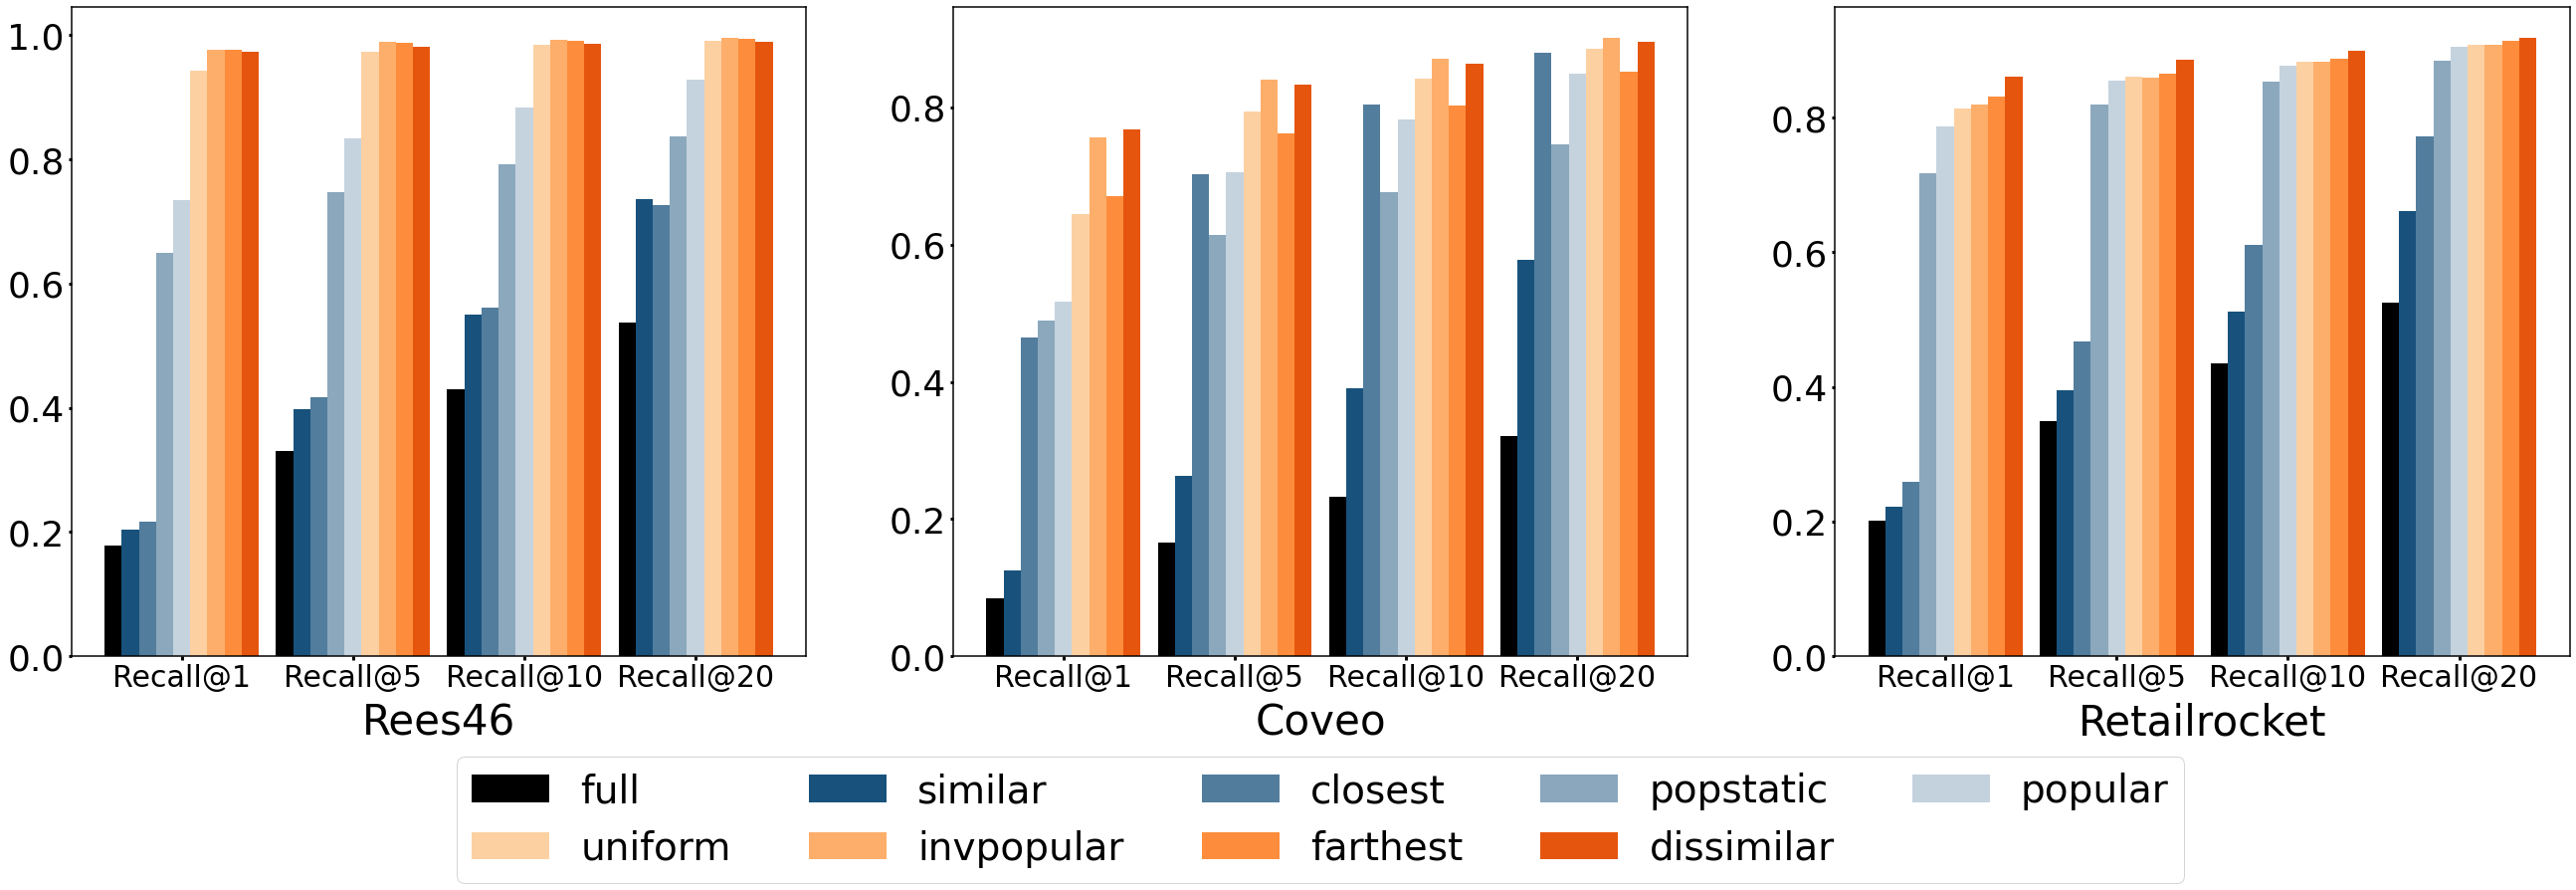

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(45,12))
for i, ds_name in enumerate(dataset_names.keys()):
    ax = axs[i] 
    create_barplot(ax, labels=recalls_labels, dataset_stats=dataset_stats[ds_name], colormap=cmap, x_label=ds_name, make_legend=True if i == 1 else False)